In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        healthy = pd.read_csv(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
cat_list = healthy.columns.tolist()
cat_list.sort()
print(cat_list)

['BrainSegVolNotVent', 'ID', 'Unnamed: 0', 'X', 'age', 'dcode', 'euler', 'euler_med', 'lh_MeanThickness_thickness', 'lh_WhiteSurfArea_area', 'lh_caudalanteriorcingulate_area', 'lh_caudalanteriorcingulate_curvind', 'lh_caudalanteriorcingulate_foldind', 'lh_caudalanteriorcingulate_gauscurv', 'lh_caudalanteriorcingulate_meancurv', 'lh_caudalanteriorcingulate_thickness', 'lh_caudalanteriorcingulate_volume', 'lh_caudalmiddlefrontal_area', 'lh_caudalmiddlefrontal_curvind', 'lh_caudalmiddlefrontal_foldind', 'lh_caudalmiddlefrontal_gauscurv', 'lh_caudalmiddlefrontal_meancurv', 'lh_caudalmiddlefrontal_thickness', 'lh_caudalmiddlefrontal_volume', 'lh_cuneus_area', 'lh_cuneus_curvind', 'lh_cuneus_foldind', 'lh_cuneus_gauscurv', 'lh_cuneus_meancurv', 'lh_cuneus_thickness', 'lh_cuneus_volume', 'lh_entorhinal_area', 'lh_entorhinal_curvind', 'lh_entorhinal_foldind', 'lh_entorhinal_gauscurv', 'lh_entorhinal_meancurv', 'lh_entorhinal_thickness', 'lh_entorhinal_volume', 'lh_fusiform_area', 'lh_fusiform_

In [3]:
healthy.drop(['X','ID','Unnamed: 0','subID'],axis = 1,inplace=True)
healthy.drop(healthy[healthy['sample'] == 'utrecht'].index, inplace = True)

In [4]:
healthy.groupby('scanner',dropna=False)['scanner'].count()

scanner
Biograph_mMR-51010      110
Guys                    268
HH                      147
IOP                      65
SiemensTrio             505
TrioTim-35177           361
TrioTim-35248           146
aomic_id1000_Philips    928
aomic_piop1_Philips     209
aomic_piop2_Philips     224
bgs_scanner             131
camcan_SIEMENSTRIO      653
cobre_scanner           138
dlbs_Philips            315
narratives_prisma1       44
narratives_prisma2       71
narratives_skyra        222
sald_Siemens            494
Name: scanner, dtype: int64

In [5]:
healthy.groupby('sample',dropna=False)['sample'].count()

sample
aomic_id1000    928
aomic_piop1     209
aomic_piop2     224
bgs             131
camcan          653
cobre           138
dlbs            315
ixi             480
narratives      337
oasis3          617
rockland        505
sald            494
Name: sample, dtype: int64

In [6]:
healthy.groupby('dcode',dropna=False)['dcode'].count()

dcode
0    4965
1      66
Name: dcode, dtype: int64

In [7]:
healthy.groupby('lh_caudalanteriorcingulate_curvind',dropna=False)['lh_caudalanteriorcingulate_foldind'].count()

lh_caudalanteriorcingulate_curvind
0.6      5
0.7      4
0.8     22
0.9     51
1.0    109
1.1    191
1.2    305
1.3    399
1.4    476
1.5    538
1.6    524
1.7    530
1.8    481
1.9    318
2.0    298
2.1    237
2.2    179
2.3    108
2.4     70
2.5     61
2.6     39
2.7     23
2.8     15
2.9     13
3.0     11
3.1      4
3.2      4
3.3      2
3.4      2
3.5      1
3.6      3
3.7      2
3.8      1
4.0      1
4.2      1
4.3      2
7.6      1
Name: lh_caudalanteriorcingulate_foldind, dtype: int64

array([[<AxesSubplot:title={'center':'lh_caudalanteriorcingulate_area'}>,
        <AxesSubplot:title={'center':'lh_caudalanteriorcingulate_curvind'}>],
       [<AxesSubplot:title={'center':'lh_caudalanteriorcingulate_foldind'}>,
        <AxesSubplot:title={'center':'lh_caudalanteriorcingulate_gauscurv'}>],
       [<AxesSubplot:title={'center':'lh_caudalanteriorcingulate_meancurv'}>,
        <AxesSubplot:title={'center':'lh_caudalanteriorcingulate_thickness'}>],
       [<AxesSubplot:title={'center':'lh_caudalanteriorcingulate_volume'}>,
        <AxesSubplot:>]], dtype=object)

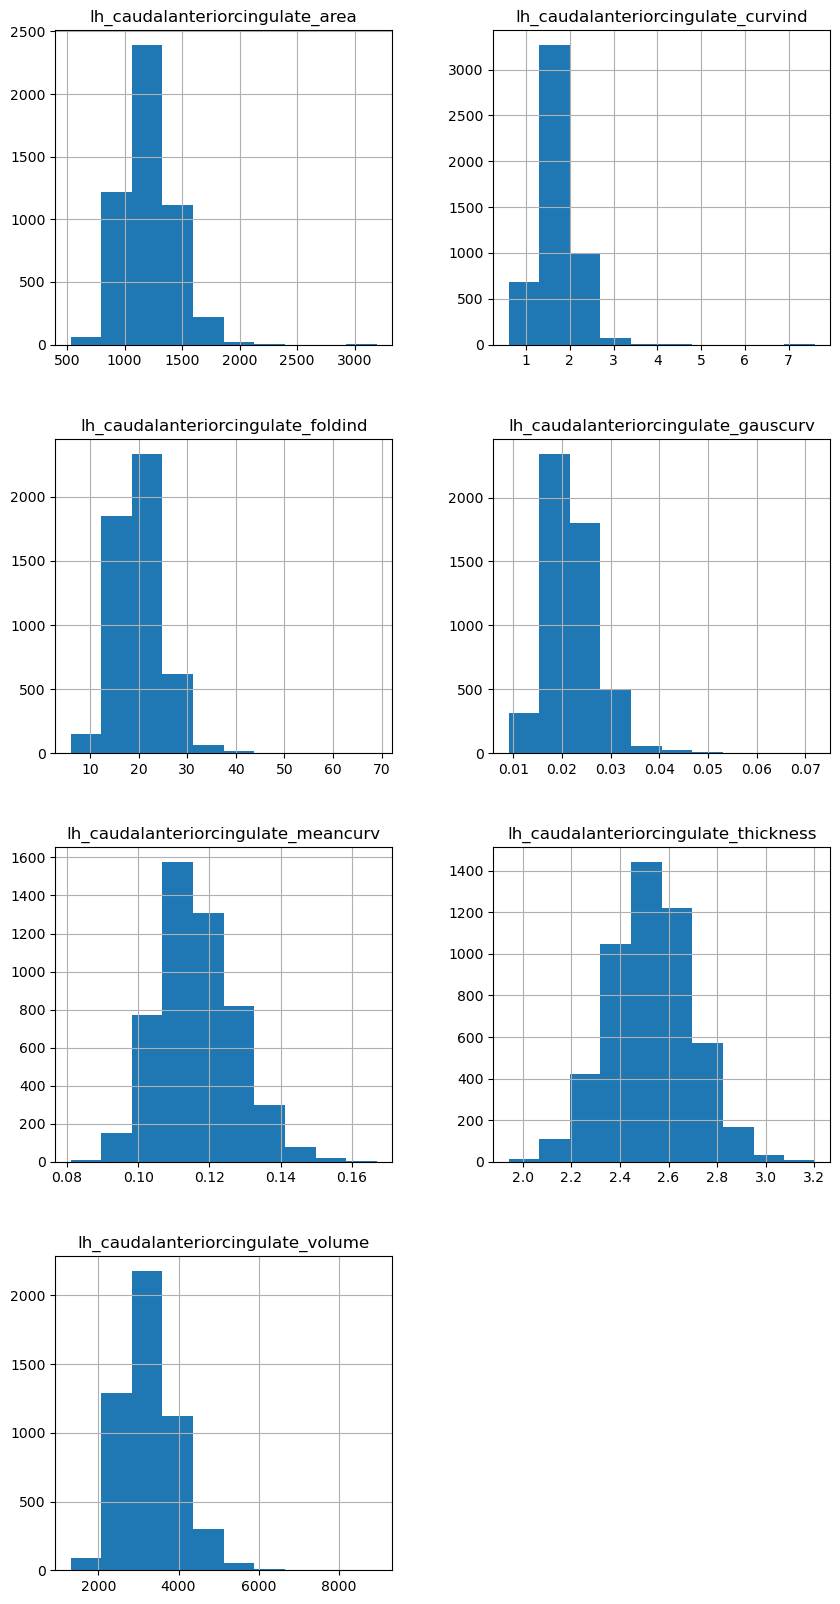

In [8]:
healthy.hist(['lh_caudalanteriorcingulate_area',
              'lh_caudalanteriorcingulate_curvind',
              'lh_caudalanteriorcingulate_foldind',
              'lh_caudalanteriorcingulate_gauscurv',
              'lh_caudalanteriorcingulate_meancurv',
              'lh_caudalanteriorcingulate_thickness',
              'lh_caudalanteriorcingulate_volume'],figsize=(10,20),layout=(4,2))